In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

path_amazon_uk = "C:\\Users\\pedro\\Documents\\ironhack\\Course\\WEEK 5\\LAB 2\\lab-eda-bivariate\\amz_uk_price_prediction_dataset.csv"
df = pd.read_csv(path_amazon_uk)

df.head()


,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


In [7]:
# Create a crosstab between product category and isBestSeller status
crosstab_best_seller = pd.crosstab(df['category'], df['isBestSeller'])

# Proportion of best-sellers for each category
crosstab_best_seller['proportion_best_seller'] = crosstab_best_seller[True] / (crosstab_best_seller[True] + crosstab_best_seller[False])

# Sort the crosstab by the proportion of best-sellers
crosstab_sorted = crosstab_best_seller.sort_values('proportion_best_seller', ascending=False)
crosstab_sorted.head(10)


isBestSeller,False,True,proportion_best_seller
category,,,
Grocery,9008,556,0.058135
Smart Home Security & Lighting,98,6,0.057692
Health & Personal Care,9017,552,0.057686
Mobile Phone Accessories,248,11,0.042471
Power & Hand Tools,8353,306,0.035339
"Billiard, Snooker & Pool",241,8,0.032129
Pet Supplies,9152,285,0.030200
Home Brewing & Wine Making,239,7,0.028455
Wind Instruments,243,7,0.028000


In [8]:
# Chi-square test for independence
chi2, p, dof, ex = chi2_contingency(crosstab_best_seller.iloc[:, :2])
chi2, p

# Cramér's V calculation
cramers_v = np.sqrt(chi2 / (crosstab_best_seller.sum().sum() * (min(crosstab_best_seller.shape) - 1)))
cramers_v

np.float64(0.08646706664522864)

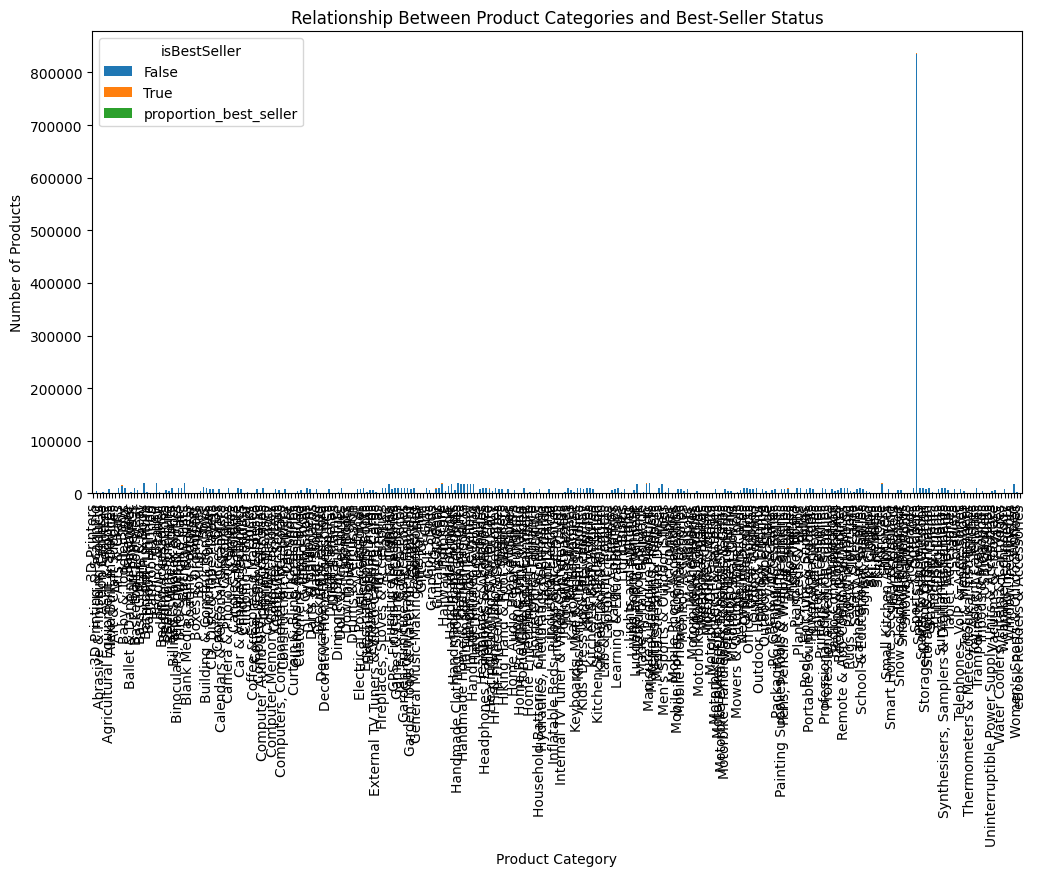

In [9]:
# Stacked bar chart
crosstab_best_seller.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Relationship Between Product Categories and Best-Seller Status')
plt.xlabel('Product Category')
plt.ylabel('Number of Products')
plt.show()


In [10]:
# Calculate IQR for price
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

# Remove outliers
df_no_outliers = df[(df['price'] >= (Q1 - 1.5 * IQR)) & (df['price'] <= (Q3 + 1.5 * IQR))]


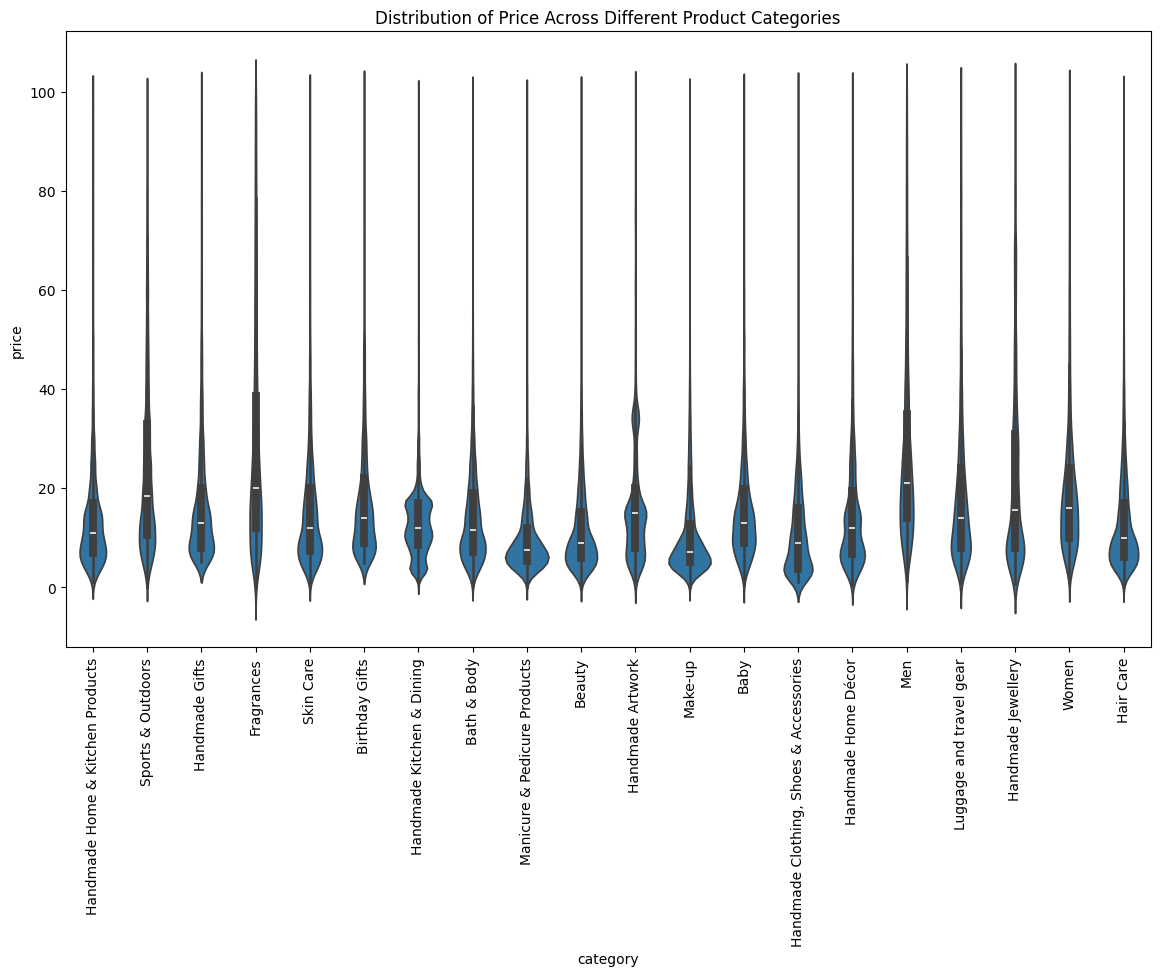

In [11]:
import seaborn as sns

# Violin plot for top 20 categories
top_20_categories = df_no_outliers['category'].value_counts().index[:20]
plt.figure(figsize=(14, 8))
sns.violinplot(x='category', y='price', data=df_no_outliers[df_no_outliers['category'].isin(top_20_categories)])
plt.title('Distribution of Price Across Different Product Categories')
plt.xticks(rotation=90)
plt.show()


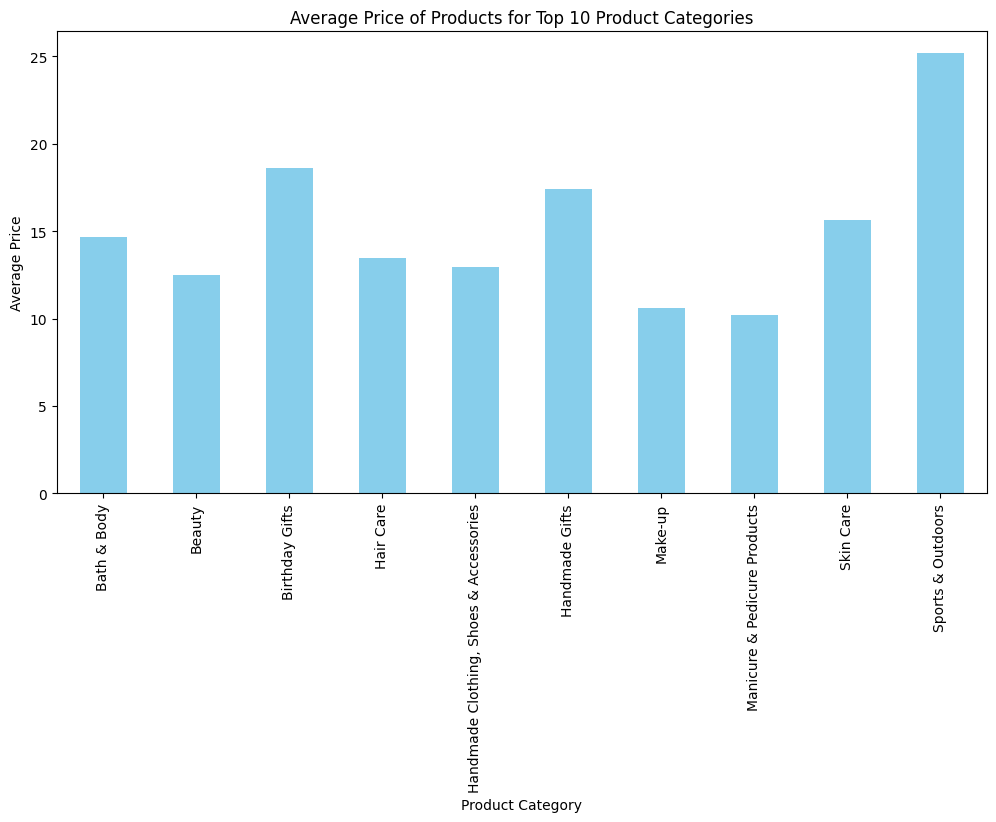

In [12]:
# Average price for top 10 categories
top_10_categories = df_no_outliers['category'].value_counts().index[:10]
avg_price_top_10 = df_no_outliers[df_no_outliers['category'].isin(top_10_categories)].groupby('category')['price'].mean()

# Bar chart
plt.figure(figsize=(12, 6))
avg_price_top_10.plot(kind='bar', color='skyblue')
plt.title('Average Price of Products for Top 10 Product Categories')
plt.xlabel('Product Category')
plt.ylabel('Average Price')
plt.show()


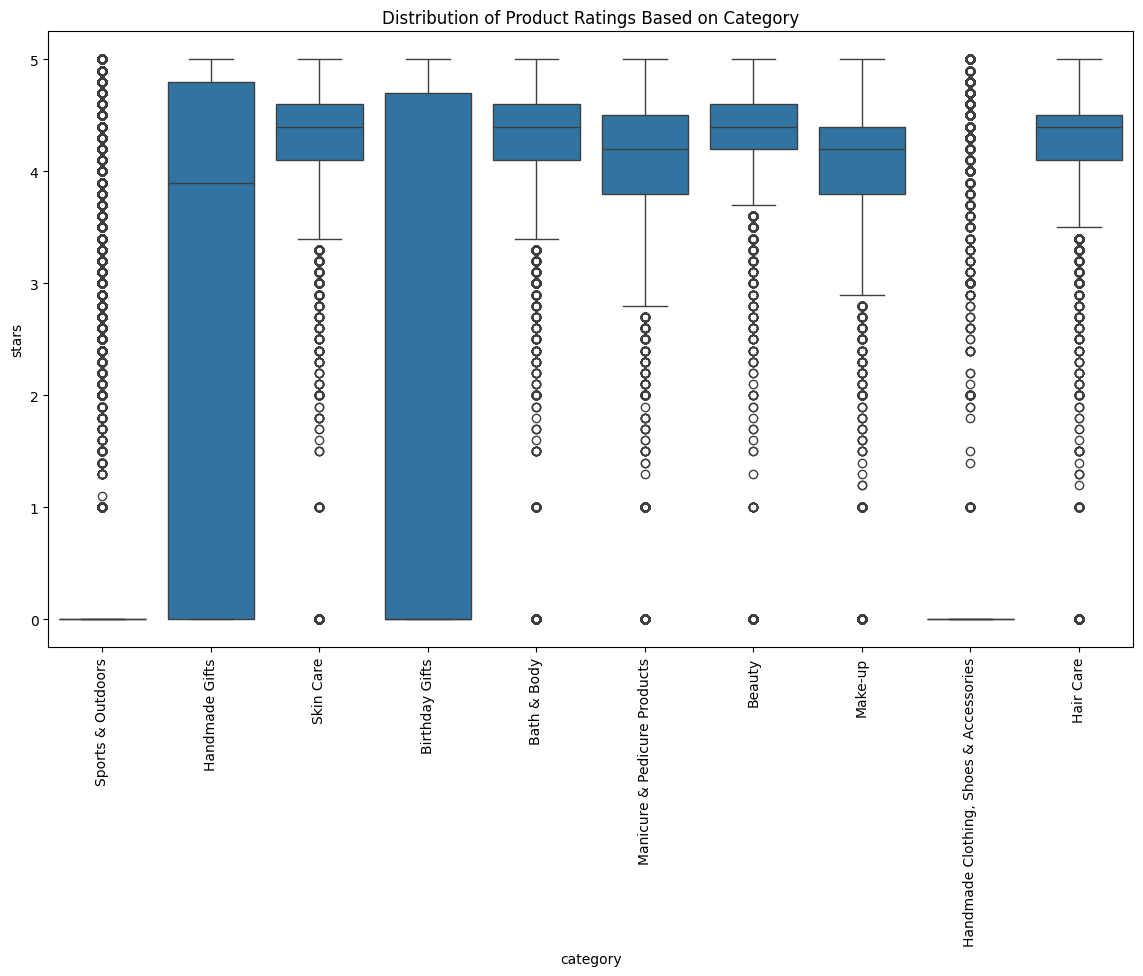

In [13]:
# Box plot for product ratings
plt.figure(figsize=(14, 8))
sns.boxplot(x='category', y='stars', data=df_no_outliers[df_no_outliers['category'].isin(top_10_categories)])
plt.title('Distribution of Product Ratings Based on Category')
plt.xticks(rotation=90)
plt.show()


In [14]:
# Correlation coefficient between price and rating
correlation_price_rating = df_no_outliers['price'].corr(df_no_outliers['stars'])
correlation_price_rating


np.float64(-0.07767299878181323)

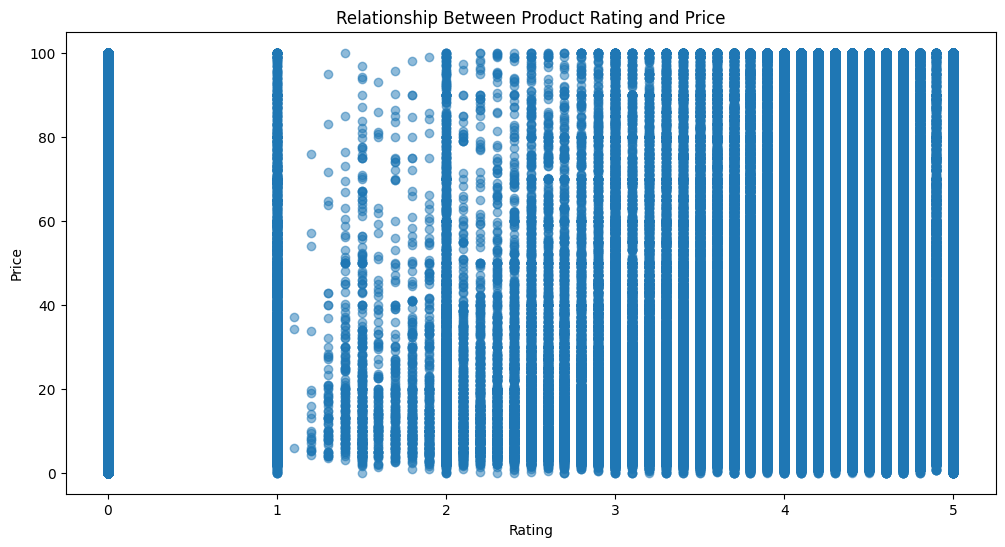

In [15]:
# Scatter plot
plt.figure(figsize=(12, 6))
plt.scatter(df_no_outliers['stars'], df_no_outliers['price'], alpha=0.5)
plt.title('Relationship Between Product Rating and Price')
plt.xlabel('Rating')
plt.ylabel('Price')
plt.show()


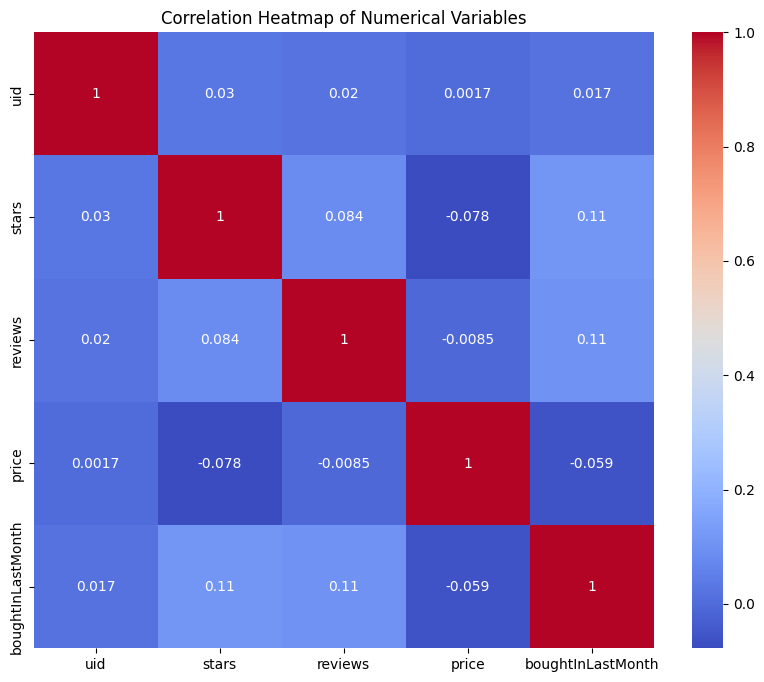

In [19]:
# Filter only numerical columns from the DataFrame
numerical_df = df_no_outliers.select_dtypes(include=[np.number])

# Calculate the correlation matrix for numerical columns
correlation_matrix = numerical_df.corr()

# Plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()


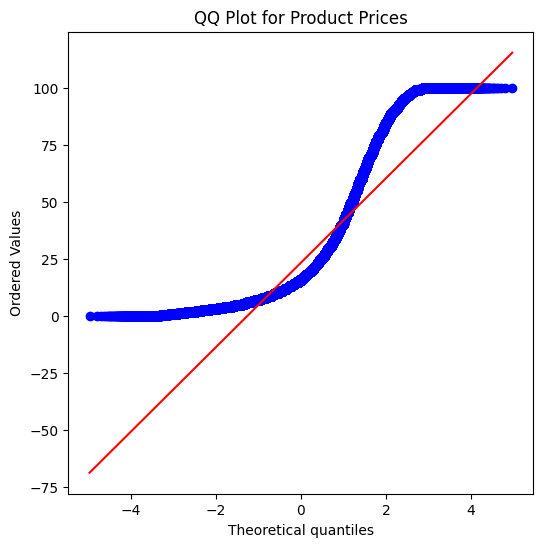

In [20]:
import scipy.stats as stats

plt.figure(figsize=(6, 6))
stats.probplot(df_no_outliers['price'], dist="norm", plot=plt)
plt.title('QQ Plot for Product Prices')
plt.show()